In [ ]:
import pandas as _hex_pandas
import datetime as _hex_datetime
import json as _hex_json

In [ ]:
hex_scheduled = _hex_json.loads("false")

In [ ]:
hex_user_email = _hex_json.loads("\"example-user@example.com\"")

In [ ]:
hex_run_context = _hex_json.loads("\"logic\"")

In [ ]:
hex_timezone = _hex_json.loads("\"UTC\"")

In [ ]:
hex_project_id = _hex_json.loads("\"d2374962-d01e-40ab-9942-54088c7db129\"")

In [ ]:
hex_project_name = _hex_json.loads("\"ES Long Only Report\"")

In [ ]:
hex_status = _hex_json.loads("\"\"")

In [ ]:
hex_categories = _hex_json.loads("[]")

In [ ]:
hex_color_palette = _hex_json.loads("[\"#4C78A8\",\"#F58518\",\"#E45756\",\"#72B7B2\",\"#54A24B\",\"#EECA3B\",\"#B279A2\",\"#FF9DA6\",\"#9D755D\",\"#BAB0AC\"]")

In [ ]:


pip install QuantStats

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"pd\",\"file_path\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import pandas as pd

# specify the file path
file_path = 'https://github.com/alexbernal0/QEP/raw/main/ESLS23.xlsx'

# read in the 'Trades List' sheet
df = pd.read_excel(file_path, sheet_name='Trades List')

# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df = df[['#', 'Type', 'Date/Time', 'Profit/Loss']]

#Add a new column called 'Exit Date/Time' with the same data as 'Date/Time'
df['Exit Date/Time'] = df['Date/Time']

# Shift the contents of the 'Exit Date/Time' column up one row
df['Exit Date/Time'] = df['Exit Date/Time'].shift(-1)

# Shift the contents of the 'Profit/Loss' column up one row
df['Profit/Loss'] = df['Profit/Loss'].shift(-1)

# Drop all rows where there is a NaN in the '#' column
df = df.dropna(subset=['#'])

#Remove Short Trades
df = df[df['Type'] !='Sell Short']

# Convert the date column to a pandas datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date', inplace=True)

df.head()

# 
 Type 
 Date/Time 
 Profit/Loss 
 Exit Date/Time 
 
 
 Date 
 
 
 
 
 
 
 
 
 
 2007-11-02 10:30:00 
 1.0 
 Buy 
 2007-11-02 10:30:00 
 -100.0 
 2007-11-05 10:00:00 
 
 
 2007-11-06 10:30:00 
 3.0 
 Buy 
 2007-11-06 10:30:00 
 -250.0 
 2007-11-07 10:00:00 
 
 
 2007-11-08 11:30:00 
 6.0 
 Buy 
 2007-11-08 11:30:00 
 -4200.0 
 2007-11-09 10:00:00 
 
 
 2007-11-12 10:30:00 
 8.0 
 Buy 
 2007-11-12 10:30:00 
 3750.0 
 2007-11-14 10:00:00 
 
 
 2007-11-12 10:30:00 
 9.0 
 Buy 
 2007-11-12 10:30:00 
 3000.0 
 2007-11-14 10:30:00

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df\",\"pd\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))


# Convert the 'Profit/Loss' and 'equity' columns to numeric data type
df['Profit/Loss'] = pd.to_numeric(df['Profit/Loss'], errors='coerce')

df['CumPL'] = 50000 + df['Profit/Loss'].cumsum()

# Convert the 'Profit/Loss' and 'equity' columns to numeric data type
df['Profit/Loss'] = pd.to_numeric(df['Profit/Loss'], errors='coerce')
df['CumPL'] = pd.to_numeric(df['CumPL'], errors='coerce')

#Create a new column called 'returnPerc'
df['returnPerc'] = df['CumPL'].pct_change()
# Set the first value of 'returnPerc' to 0
df.at[df.index[0], 'returnPerc'] = -0.002


df.head()

# 
 Type 
 Date/Time 
 Profit/Loss 
 Exit Date/Time 
 CumPL 
 returnPerc 
 
 
 Date 
 
 
 
 
 
 
 
 
 
 
 
 2007-11-02 10:30:00 
 1.0 
 Buy 
 2007-11-02 10:30:00 
 -100.0 
 2007-11-05 10:00:00 
 49900.0 
 -0.002000 
 
 
 2007-11-06 10:30:00 
 3.0 
 Buy 
 2007-11-06 10:30:00 
 -250.0 
 2007-11-07 10:00:00 
 49650.0 
 -0.005010 
 
 
 2007-11-08 11:30:00 
 6.0 
 Buy 
 2007-11-08 11:30:00 
 -4200.0 
 2007-11-09 10:00:00 
 45450.0 
 -0.084592 
 
 
 2007-11-12 10:30:00 
 8.0 
 Buy 
 2007-11-12 10:30:00 
 3750.0 
 2007-11-14 10:00:00 
 49200.0 
 0.082508 
 
 
 2007-11-12 10:30:00 
 9.0 
 Buy 
 2007-11-12 10:30:00 
 3000.0 
 2007-11-14 10:30:00 
 52200.0 
 0.060976

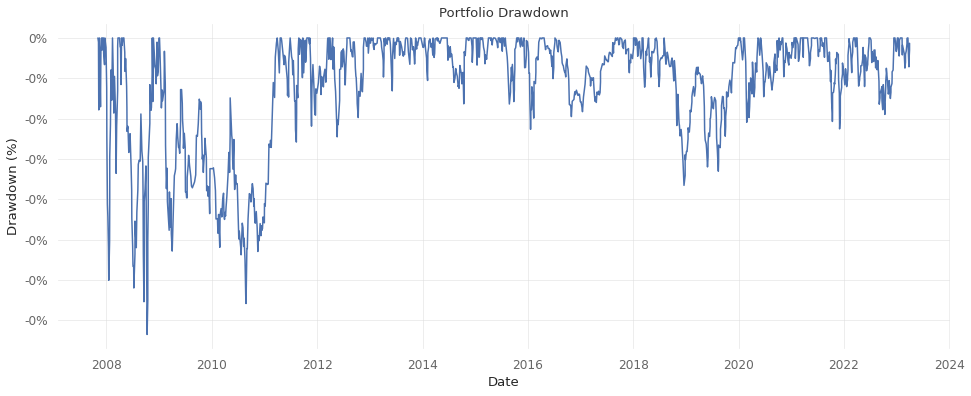

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"plt\",\"mtick\",\"cum_max_equity\",\"drawdown\",\"fmt\",\"yticks\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Calculate the maximum equity up to each date
cum_max_equity = df['CumPL'].cummax()

# Calculate the drawdown as a percentage from the maximum equity
drawdown = (df['CumPL'] - cum_max_equity) / cum_max_equity

# Set the figure size
plt.figure(figsize=(16,6))

# Plot the drawdown
plt.plot(drawdown)
plt.title('Portfolio Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')

# Format y-axis as percentage
fmt = '%.0f%%' 
yticks = mtick.FormatStrFormatter(fmt)
plt.gca().yaxis.set_major_formatter(yticks)

plt.show()

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"cumulative_return\",\"drawdown\",\"average_drawdown\",\"drawdown_duration\",\"recovery_factor\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the cumulative return and drawdown
cumulative_return = (1 + df['CumPL'].pct_change()).cumprod()
drawdown = (cumulative_return.cummax() - cumulative_return) / cumulative_return.cummax()

# Calculate the average drawdown
average_drawdown = -1 * drawdown.mean()

# Calculate the average drawdown time in days
drawdown_duration = drawdown[drawdown > 0].index.to_series().diff().mean().days

# Calculate the recovery factor
recovery_factor = -1 * cumulative_return.min() / average_drawdown

# Print the portfolio statistics

print(f"Average drawdown: {average_drawdown:.2%}")
print(f"Average drawdown duration: {drawdown_duration} days")
print(f"Recovery factor: {recovery_factor:.2f}")

Average drawdown: -5.83%
Average drawdown duration: 4 days
Recovery factor: 15.63


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"total_return\",\"num_years\",\"cagr\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the total return of the portfolio
total_return = df['CumPL'][-1] / df['CumPL'][0] - 1

# Calculate the number of years that the portfolio has been invested
num_years = (df.index[-1] - df.index[0]).days / 365.25

# Calculate the CAGR
cagr = (1 + total_return)**(1/num_years) - 1

print('CAGR: {:.2%}'.format(cagr))

CAGR: 16.56%


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"monthly_returns\",\"monthly_returns_df\",\"df\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the monthly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()

# Display the monthly returns as a DataFrame
monthly_returns_df = pd.DataFrame({'Monthly Return': monthly_returns * 100})
print(monthly_returns_df.tail(50))

            Monthly Return
Date                      
2019-02-28        3.230438
2019-03-31        1.764604
2019-04-30       -0.341676
2019-05-31      -11.845376
2019-06-30       10.354886
2019-07-31       -2.801762
2019-08-31       -1.595359
2019-09-30       -0.967207
2019-10-31        6.994698
2019-11-30        3.181779
2019-12-31        3.943045
2020-01-31       -0.494448
2020-02-29       -5.808081
2020-03-31        4.289544
2020-04-30        3.764823
2020-05-31        4.723088
2020-06-30       -1.869658
2020-07-31        0.451046
2020-08-31       -0.309669
2020-09-30        3.075250
2020-10-31        5.386876
2020-11-30        3.788962
2020-12-31       -1.914864
2021-01-31        1.278090
2021-02-28        3.737346
2021-03-31        8.495421
2021-04-30        4.349433
2021-05-31        0.549061
2021-06-30        2.348658
2021-07-31        0.120475
2021-08-31        0.790740
2021-09-30       -5.383741
2021-10-31       -0.342486
2021-11-30       -1.223924
2021-12-31        2.417140
2

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"yearly_returns\",\"yearly_returns_df\",\"df\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate the yearly returns
yearly_returns = df['CumPL'].resample('Y').last().pct_change()

# Display the yearly returns as a DataFrame
yearly_returns_df = pd.DataFrame({'Yearly Return': yearly_returns * 100})
print(yearly_returns_df.head(20))

            Yearly Return
Date                     
2007-12-31            NaN
2008-12-31      42.920847
2009-12-31     -15.548622
2010-12-31      -5.172414
2011-12-31      46.655844
2012-12-31      30.241311
2013-12-31      18.816930
2014-12-31      20.143062
2015-12-31      25.803763
2016-12-31      -2.517747
2017-12-31       8.010486
2018-12-31      -6.571377
2019-12-31      18.704898
2020-12-31      15.425144
2021-12-31      17.830056
2022-12-31      15.584957
2023-12-31       9.116222


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"monthly_returns\",\"best_month\",\"best_month_return\",\"worst_month\",\"worst_month_return\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate monthly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()

# Find the best and worst performing months
best_month = monthly_returns.idxmax().strftime('%B %Y')
best_month_return = monthly_returns.max() * 100
worst_month = monthly_returns.idxmin().strftime('%B %Y')
worst_month_return = monthly_returns.min() * 100

# Display the results
print(f"Best performing month: {best_month}, Return: {best_month_return:.2f}%")
print(f"Worst performing month: {worst_month}, Return: {worst_month_return:.2f}%")

Best performing month: March 2008, Return: 26.63%
Worst performing month: June 2008, Return: -16.70%


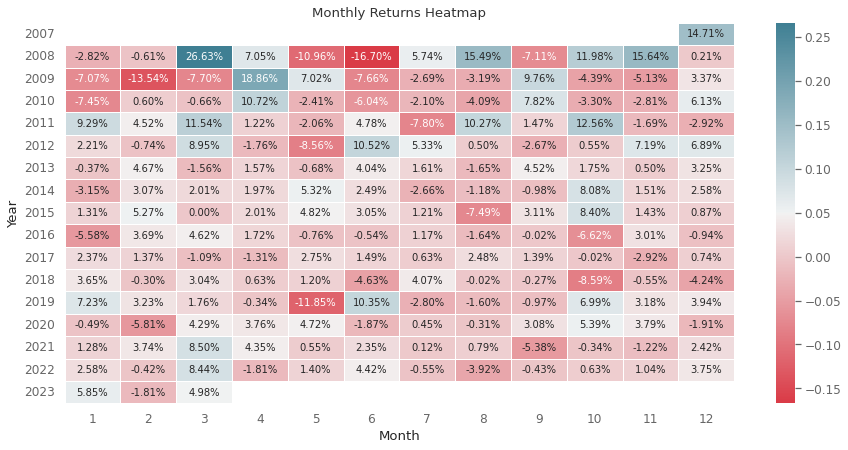

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"sns\",\"plt\",\"monthly_returns\",\"monthly_returns_pivot\",\"fig\",\"ax\",\"cmap\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import seaborn as sns
import matplotlib.pyplot as plt
# Calculate monthly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()

# Create a pivot table of monthly returns
monthly_returns_pivot = monthly_returns.reset_index().pivot_table(index=monthly_returns.index.year, columns=monthly_returns.index.month, values='CumPL')

# Create heatmap
fig, ax = plt.subplots(figsize=(15,7))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(monthly_returns_pivot, annot=True, fmt=".2%", linewidths=0.5, ax=ax, cmap=cmap)
plt.title('Monthly Returns Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"yearly_returns\",\"best_years\",\"worst_years\",\"year\",\"return_\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate yearly returns
yearly_returns = df['CumPL'].resample('Y').last().pct_change()

# Find the best and worst performing years
best_years = yearly_returns.sort_values(ascending=False).head(3)
worst_years = yearly_returns.sort_values().head(3)

# Display the results
print("Best performing years:")
for year, return_ in best_years.items():
    print(f"- Year: {year.year}, Return: {return_*100:.2f}%")

print("\nWorst performing years:")
for year, return_ in worst_years.items():
    print(f"- Year: {year.year}, Return: {return_*100:.2f}%")

Best performing years:
- Year: 2011, Return: 46.66%
- Year: 2008, Return: 42.92%
- Year: 2012, Return: 30.24%

Worst performing years:
- Year: 2009, Return: -15.55%
- Year: 2018, Return: -6.57%
- Year: 2010, Return: -5.17%


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"monthly_returns\",\"quarterly_returns\",\"yearly_returns\",\"positive_months\",\"positive_quarters\",\"positive_years\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Calculate monthly, quarterly, and yearly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()
quarterly_returns = df['CumPL'].resample('Q').last().pct_change()
yearly_returns = df['CumPL'].resample('Y').last().pct_change()

# Calculate percentage of positive months, quarters, and years
positive_months = (monthly_returns > 0).mean() * 100
positive_quarters = (quarterly_returns > 0).mean() * 100
positive_years = (yearly_returns > 0).mean() * 100

#Display the results
print(f"Percentage of positive months: {positive_months:.2f}%")
print(f"Percentage of positive quarters: {positive_quarters:.2f}%")
print(f"Percentage of positive years: {positive_years:.2f}%")

Percentage of positive months: 58.38%
Percentage of positive quarters: 69.35%
Percentage of positive years: 70.59%


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df\",\"top_10_drawdowns\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

df = df.reset_index()

# calculate the drawdowns
df['peak'] = df['CumPL'].cummax()
df['drawdown'] = df['CumPL'] - df['peak']
df['drawdown_pct'] = df['drawdown'] / df['peak'] * 100

# get the top 10 drawdowns
top_10_drawdowns = df.sort_values('drawdown_pct').head(10)[['Date', 'drawdown_pct']]

# rename columns
top_10_drawdowns = top_10_drawdowns.rename(columns={'Date': 'Start Date', 'drawdown_pct': 'Drawdown (%)'})

# reset index
top_10_drawdowns = top_10_drawdowns.reset_index(drop=True)

# display the table
print(top_10_drawdowns[['Start Date', 'Drawdown (%)']])

           Start Date  Drawdown (%)
0 2008-10-08 15:30:00    -36.758445
1 2010-08-25 14:30:00    -32.920537
2 2008-09-16 16:00:00    -32.699404
3 2008-10-13 10:30:00    -32.500710
4 2010-08-23 10:30:00    -31.991744
5 2008-07-08 13:00:00    -30.996310
6 2008-01-16 13:30:00    -30.040397
7 2008-09-18 11:00:00    -28.441669
8 2008-07-03 12:30:00    -28.328129
9 2008-07-07 10:00:00    -28.328129


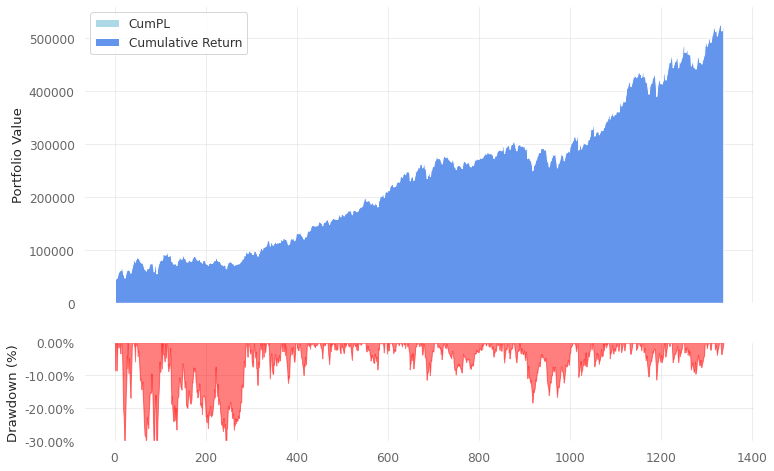

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"pd\",\"plt\",\"cumulative_return\",\"drawdown\",\"fig\",\"ax\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the cumulative return and drawdown
cumulative_return = (1 + df['CumPL'].pct_change()).cumprod()
drawdown = (cumulative_return.cummax() - cumulative_return) / cumulative_return.cummax()

# Invert the drawdown so it shows a negative number
drawdown = -1 * drawdown

# Create a stacked line plot with drawdown plot beneath it
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].stackplot(df.index, df['CumPL'], cumulative_return-df['CumPL'], labels=['CumPL', 'Cumulative Return'], colors=['lightblue', 'cornflowerblue'])
ax[1].fill_between(df.index, drawdown, 0, color='red', alpha=0.5)
ax[1].set_ylim(-0.3, 0)
ax[0].legend(loc='upper left')
ax[0].set_ylabel('Portfolio Value')
ax[1].set_ylabel('Drawdown (%)')
ax[1].yaxis.set_major_formatter('{x:.2%}')
plt.show()

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"pd\",\"np\",\"plt\",\"norm\",\"daily_returns\",\"cumulative_return\",\"average_daily_return\",\"std_daily_return\",\"annualized_volatility\",\"sharpe_ratio\",\"sortino_ratio\",\"var_95\",\"daily_var_95\",\"average_monthly_return\",\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# calculate daily returns
daily_returns = df['CumPL'].pct_change()

# calculate portfolio statistics
cumulative_return = (df['CumPL'].iloc[-1] / df['CumPL'].iloc[0]) - 1
average_daily_return = daily_returns.mean()
std_daily_return = daily_returns.std()
annualized_volatility = std_daily_return * np.sqrt(252)
sharpe_ratio = np.sqrt(252) * (average_daily_return / std_daily_return)
sortino_ratio = np.sqrt(252) * (average_daily_return / daily_returns[daily_returns < 0].std())
var_95 = norm.ppf(0.05, average_daily_return, std_daily_return) * df['CumPL'].iloc[-1]
daily_var_95 = -var_95 / len(df.index)
average_monthly_return = ((1 + cumulative_return) ** (1 / len(df.index)) - 1) * 100



# display portfolio statistics
print(f"Cumulative return: {cumulative_return.item():.2%}")
print(f"Average daily return: {average_daily_return.item():.2%}")
print(f"Daily return volatility: {std_daily_return.item():.2%}")
print(f"Annualized volatility: {annualized_volatility.item():.2%}")
print(f"Sharpe ratio: {sharpe_ratio.item():.2f}")
print(f"Sortino ratio: {sortino_ratio.item():.2f}")
print(f"95% VaR (1 day): {var_95.item():.2f}")
print(f"Daily VaR (95%, 1 day): {daily_var_95.item():.2f}")
print(f"Average monthly return: {average_monthly_return:.2f}%")

Cumulative return: 960.22%
Average daily return: 0.20%
Daily return volatility: 2.36%
Annualized volatility: 37.51%
Sharpe ratio: 1.38
Sortino ratio: 1.90
95% VaR (1 day): -19479.55
Daily VaR (95%, 1 day): 14.57
Average monthly return: 0.18%


In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

df.head()

Date 
 # 
 Type 
 Date/Time 
 Profit/Loss 
 Exit Date/Time 
 CumPL 
 returnPerc 
 peak 
 drawdown 
 drawdown_pct 
 
 
 
 
 0 
 2007-11-02 10:30:00 
 1.0 
 Buy 
 2007-11-02 10:30:00 
 -100.0 
 2007-11-05 10:00:00 
 49900.0 
 -0.002000 
 49900.0 
 0.0 
 0.000000 
 
 
 1 
 2007-11-06 10:30:00 
 3.0 
 Buy 
 2007-11-06 10:30:00 
 -250.0 
 2007-11-07 10:00:00 
 49650.0 
 -0.005010 
 49900.0 
 -250.0 
 -0.501002 
 
 
 2 
 2007-11-08 11:30:00 
 6.0 
 Buy 
 2007-11-08 11:30:00 
 -4200.0 
 2007-11-09 10:00:00 
 45450.0 
 -0.084592 
 49900.0 
 -4450.0 
 -8.917836 
 
 
 3 
 2007-11-12 10:30:00 
 8.0 
 Buy 
 2007-11-12 10:30:00 
 3750.0 
 2007-11-14 10:00:00 
 49200.0 
 0.082508 
 49900.0 
 -700.0 
 -1.402806 
 
 
 4 
 2007-11-12 10:30:00 
 9.0 
 Buy 
 2007-11-12 10:30:00 
 3000.0 
 2007-11-14 10:30:00 
 52200.0 
 0.060976 
 52200.0 
 0.0 
 0.000000

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"df\",\"df\",\"pd\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df = df[['Date/Time', 'returnPerc']]

# Convert the date/time column to a pandas datetime object
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

# Rename the date/time column to just 'date'
df = df.rename(columns={'Date/Time': 'Date'})

# Set the date column as the index
df.set_index('Date', inplace=True)

df.index = pd.to_datetime(df.index, utc=True).tz_localize(None)

df.head(40)

returnPerc 
 
 
 Date 
 
 
 
 
 
 2007-11-02 10:30:00 
 -0.002000 
 
 
 2007-11-06 10:30:00 
 -0.005010 
 
 
 2007-11-08 11:30:00 
 -0.084592 
 
 
 2007-11-12 10:30:00 
 0.082508 
 
 
 2007-11-12 10:30:00 
 0.060976 
 
 
 2007-11-20 11:00:00 
 -0.085249 
 
 
 2007-11-23 10:00:00 
 0.078534 
 
 
 2007-11-27 12:30:00 
 0.072816 
 
 
 2007-11-27 12:30:00 
 0.077828 
 
 
 2007-11-30 11:30:00 
 -0.015113 
 
 
 2007-12-05 11:30:00 
 0.077579 
 
 
 2007-12-10 12:30:00 
 0.003956 
 
 
 2007-12-12 12:30:00 
 -0.019701 
 
 
 2007-12-18 10:30:00 
 -0.013666 
 
 
 2007-12-20 16:00:00 
 0.061125 
 
 
 2007-12-20 16:00:00 
 0.045699 
 
 
 2007-12-28 13:00:00 
 -0.011752 
 
 
 2008-01-02 10:00:00 
 -0.050539 
 
 
 2008-01-03 10:30:00 
 -0.064188 
 
 
 2008-01-07 12:30:00 
 -0.095358 
 
 
 2008-01-10 13:30:00 
 -0.020342 
 
 
 2008-01-14 11:00:00 
 -0.048136 
 
 
 2008-01-16 13:30:00 
 -0.055528 
 
 
 2008-01-22 10:00:00 
 0.068241 
 
 
 2008-01-23 11:00:00 
 0.073710 
 
 
 2008-01-23 11:00:00 
 0.062243 
 
 
 2008-01-28 12:00:00 
 0.047393 
 
 
 2008-01-31 13:30:00 
 0.075689 
 
 
 2008-02-06 12:30:00 
 -0.039006 
 
 
 2008-02-11 15:00:00 
 0.085953 
 
 
 2008-02-19 10:00:00 
 -0.064492 
 
 
 2008-02-20 15:00:00 
 -0.030552 
 
 
 2008-02-25 11:00:00 
 0.050101 
 
 
 2008-03-03 13:00:00 
 -0.045402 
 
 
 2008-03-05 10:30:00 
 -0.048368 
 
 
 2008-03-07 13:30:00 
 -0.038119 
 
 
 2008-03-11 10:30:00 
 0.070454 
 
 
 2008-03-18 10:30:00 
 0.049362 
 
 
 2008-03-18 10:30:00 
 0.058800 
 
 
 2008-03-20 11:30:00 
 0.055535

Performance Metrics

                           Strategy
-------------------------  ----------
Start Period               2007-11-02
End Period                 2023-03-31
Risk-Free Rate             0.0%
Time in Market             97.0%

Cumulative Return          958.1%
CAGR﹪                     16.53%

Sharpe                     1.37
Prob. Sharpe Ratio         99.92%
Smart Sharpe               1.23
Sortino                    2.09
Smart Sortino              1.86
Sortino/√2                 1.48
Smart Sortino/√2           1.32
Omega                      1.29

Max Drawdown               -36.76%
Longest DD Days            813
Volatility (ann.)          37.5%
Calmar                     0.45
Skew                       0.0
Kurtosis                   5.25

Expected Daily %           0.18%
Expected Monthly %         1.28%
Expected Yearly %          14.89%
Kelly Criterion            12.41%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.68%
Expected Shortfall (cVaR)  -3.68%

Max Consecutive Wins       

None

5 Worst Drawdowns

Start 
 Valley 
 End 
 Days 
 Max Drawdown 
 99% Max Drawdown 
 
 
 
 
 1 
 2008-05-06 
 2008-10-08 
 2008-11-13 
 190 
 -36.758445 
 -32.699404 
 
 
 2 
 2009-01-05 
 2010-08-25 
 2011-03-29 
 813 
 -32.920537 
 -27.554180 
 
 
 3 
 2007-12-28 
 2008-01-16 
 2008-02-11 
 45 
 -30.040397 
 -25.927286 
 
 
 4 
 2018-08-09 
 2018-12-18 
 2019-12-31 
 508 
 -18.273158 
 -16.516909 
 
 
 5 
 2008-02-19 
 2008-03-07 
 2008-03-20 
 30 
 -16.782704 
 -13.484793

Strategy Visualization

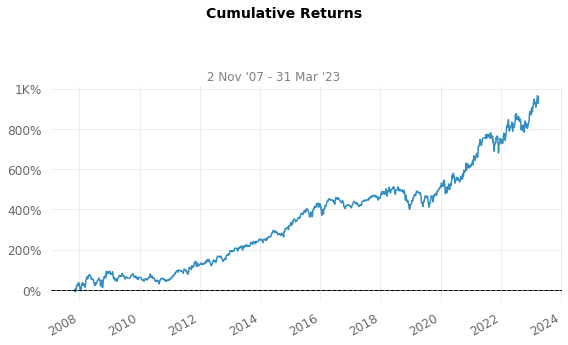

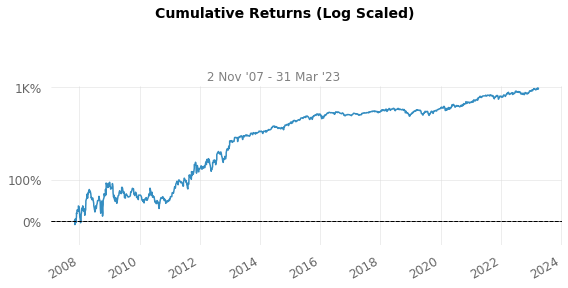

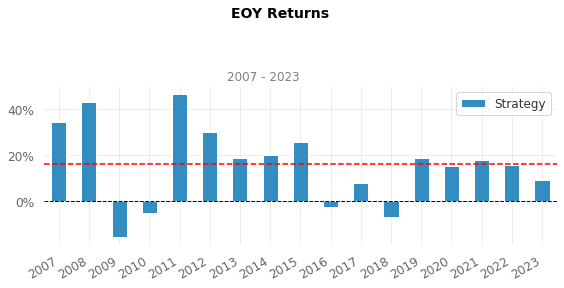

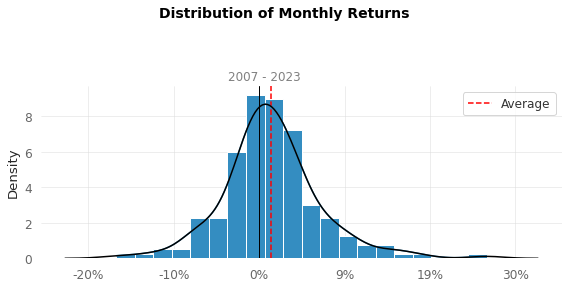

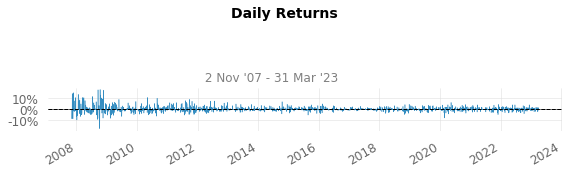

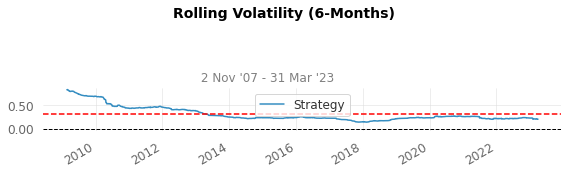

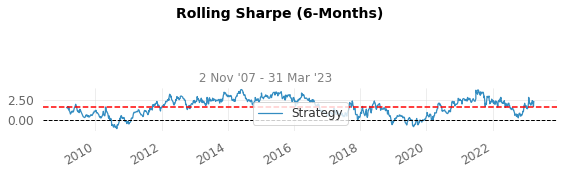

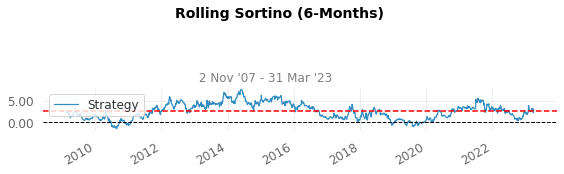

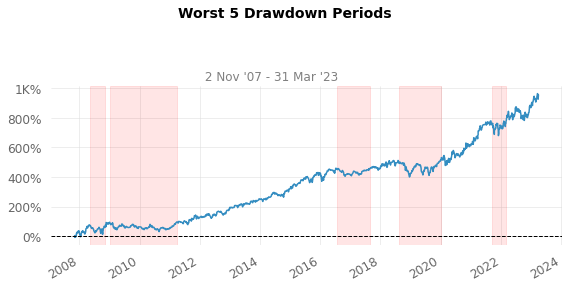

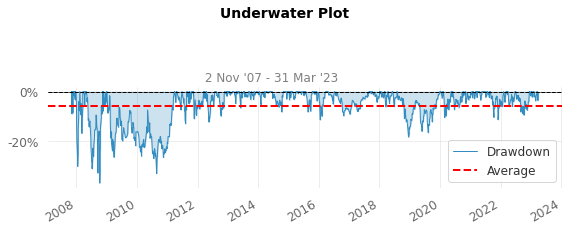

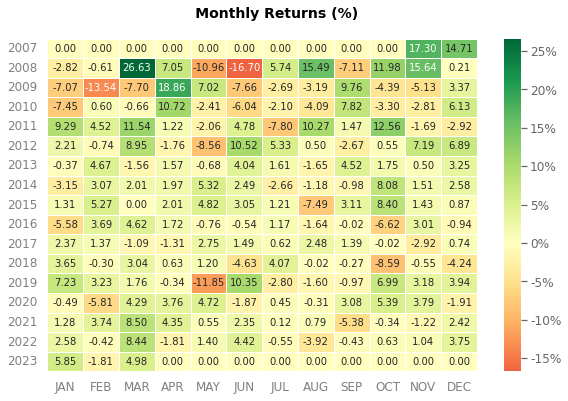

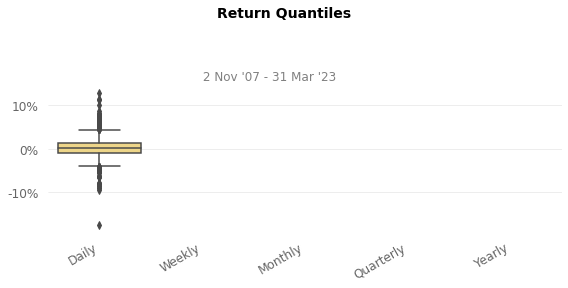

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"series\",\"df\",\"pd\",\"df\",\"qs\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

#Convert dataframe to a series
series = pd.Series(df.returnPerc, index=df.index)
# reset the index to ensure each row has a unique index
df = df.reset_index()

#calc the quantstats report
qs.extend_pandas()
qs.reports.full(series)

In [ ]:
import json as _hex_json
_hex_pks.kernel_execution.scope_watcher.mark_dirty_scope_items(args=_hex_types.MarkDirtyScopeItemsArgs.from_dict({**_hex_json.loads("{\"dirty_scope_items\":[\"qs\",\"series\"]}")}), app_session_token=_hex_APP_SESSION_TOKEN, python_kernel_init_status=_hex_python_kernel_init_status, hex_timezone=_hex_kernel.variable_or_none("hex_timezone", scope_getter=lambda: globals()), interrupt_event=locals().get("_hex_interrupt_event"))

qs.reports.html(series,title='ES Long Only')